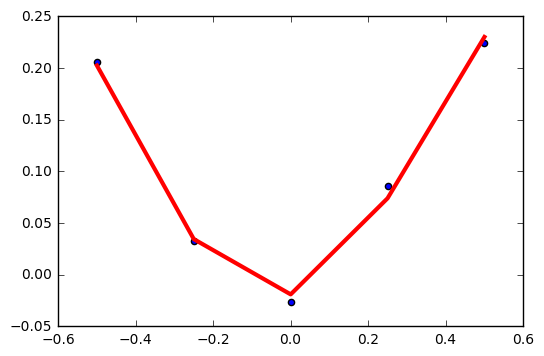

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 定义样本数据
# 使用numpy在（-0.5 到 0.5）之间生成均匀分布的200个随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]  #200行 1列
# 生成干扰项
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

# x_data = np.array([[0.2204],[0.1216],[0.1534],[0.0852],[0.1940]])
# y_data = np.array([[0.390],[0.262],[0.335],[0.178],[0.360]])  


# 根据样本样式定义创建占位符（1列）
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

# 定义神经网络的中间层
# 
# 1行10列（输入层1个数据，中间层10个神经元）
Weights_L1 = tf.Variable(tf.random_normal([1,10])) 
biases_L1 =  tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 =  tf.matmul(x,Weights_L1) + biases_L1
# 激活函数：tanh (双曲正切函数)
# 中间层输出：L1 （10个神经元）
L1 = tf.nn.tanh(Wx_plus_b_L1)


# 定义神经网络的输出层
#
# 10行1列（中间层10个神经元，输出层1个）
Weights_L2 = tf.Variable(tf.random_normal([10,1])) 
biases_L2 =  tf.Variable(tf.zeros([1,1]))
# 中间层的输出作为输出层的输入
Wx_plus_b_L2 =  tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)


# 二次代阶函数
loss = tf.reduce_mean(tf.square(y - prediction))

# 定义一个梯度下降法来进行训练的优化器
train =  tf.train.GradientDescentOptimizer(0.1).minimize(loss)


# 常用写法（无需手动关闭会话）
with tf.Session() as sess: 
    # 初始化全部变量
    sess.run(tf.global_variables_initializer())
    # 训练2000次
    for step in range(2000):
       sess.run(train,feed_dict={x:x_data,y:y_data})
        
    # 获取预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
                         
    # 画图
    plt.figure()
    # 绘制样本点
    plt.scatter(x_data,y_data)
    # 预测结果用红色实线绘制
    plt.plot(x_data,prediction_value,'r-',lw=3)
    plt.show()
                